<a href="https://colab.research.google.com/github/Jins10/Deep_Learning/blob/main/Dog_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
!unzip dogs.zip


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_heights, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dogs/train",
    image_size = (img_heights, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "dogs/test",
    image_size = (img_heights, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "dogs/valid",
    image_size = (img_heights, img_width),
    batch_size = batch_size
)



Found 7946 files belonging to 70 classes.
Found 700 files belonging to 70 classes.
Found 700 files belonging to 70 classes.


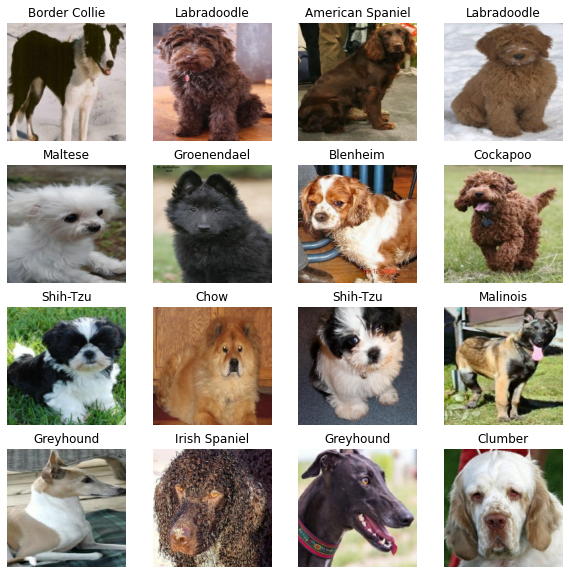

In [ ]:
class_name = ["Afghan", "African Wild Dog", "Airedale", "American Hairless", "American Spaniel", 
"Basenji", "Basset", "Beagle", "Bearded Collie", "Bermaise", "Bichon Frise,", "Blenheim", 
"Bloodhound", "Bluetick", "Border Collie", "Borzoi", "Boston Terrier", "Boxer", 
"Bull Mastiff", "Bull Terrier", "Bulldog", "Cairn", "Chihuahua", "Chinese Crested", "Chow", 
"Clumber", "Cockapoo", "Cocker", "Collie", "Corgi", "Coyote", "Dalmation", "Dhole", "Dingo", 
"Doberman", "Elk Hound", "French Bulldog", "German Sheperd", "Golden Retriever", 
"Great Dane", "Great Perenees", "Greyhound", "Groenendael", "Irish Spaniel", 
"Irish Wolfhound", "Japanese Spaniel", "Komondor", "Labradoodle", "Labrador", "Lhasa", 
"Malinois", "Maltese", "Mex Hairless", "Newfoundland", "Pekinese", "Pit Bull", "Pomeranian", 
"Poodle", "Pug", "Rhodesian", "Rottweiler", "Saint Bernard", "Schnauzer", "Scotch Terrier", 
"Shar_Pei", "Shiba Inu", "Shih-Tzu", "Siberian Husky", "Vizsla", "Yorkie"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4,4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_heights,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', input_shape=(100, 100, 3), activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(5)
# ])
# 컨볼루션 신경망의 설정
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, kernel_size=(3, 3), input_shape=(100, 100, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.Dropout(0.25),#과적합을 막기위해 날려버림

  layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.Dropout(0.25),#과적합을 막기위해 날려버림

  layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.Dropout(0.25),#과적합을 막기위해 날려버림

  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(70, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 87, 87, 64)        18496     
                                                     

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 30
)

Epoch 1/30
249/249 [==============================] - 24s 94ms/step - loss: nan - accuracy: 0.0132 - val_loss: nan - val_accuracy: 0.0143
Epoch 2/30
249/249 [==============================] - 24s 94ms/step - loss: nan - accuracy: 0.0132 - val_loss: nan - val_accuracy: 0.0143
Epoch 3/30
249/249 [==============================] - 24s 94ms/step - loss: nan - accuracy: 0.0132 - val_loss: nan - val_accuracy: 0.0143
Epoch 4/30
249/249 [==============================] - 24s 94ms/step - loss: nan - accuracy: 0.0132 - val_loss: nan - val_accuracy: 0.0143
Epoch 5/30
249/249 [==============================] - 24s 94ms/step - loss: nan - accuracy: 0.0132 - val_loss: nan - val_accuracy: 0.0143
Epoch 6/30
249/249 [==============================] - 24s 94ms/step - loss: nan - accuracy: 0.0132 - val_loss: nan - val_accuracy: 0.0143
Epoch 7/30
249/249 [==============================] - 24s 94ms/step - loss: nan - accuracy: 0.0132 - val_loss: nan - val_accuracy: 0.0143
Epoch 8/30
249/249 [==============

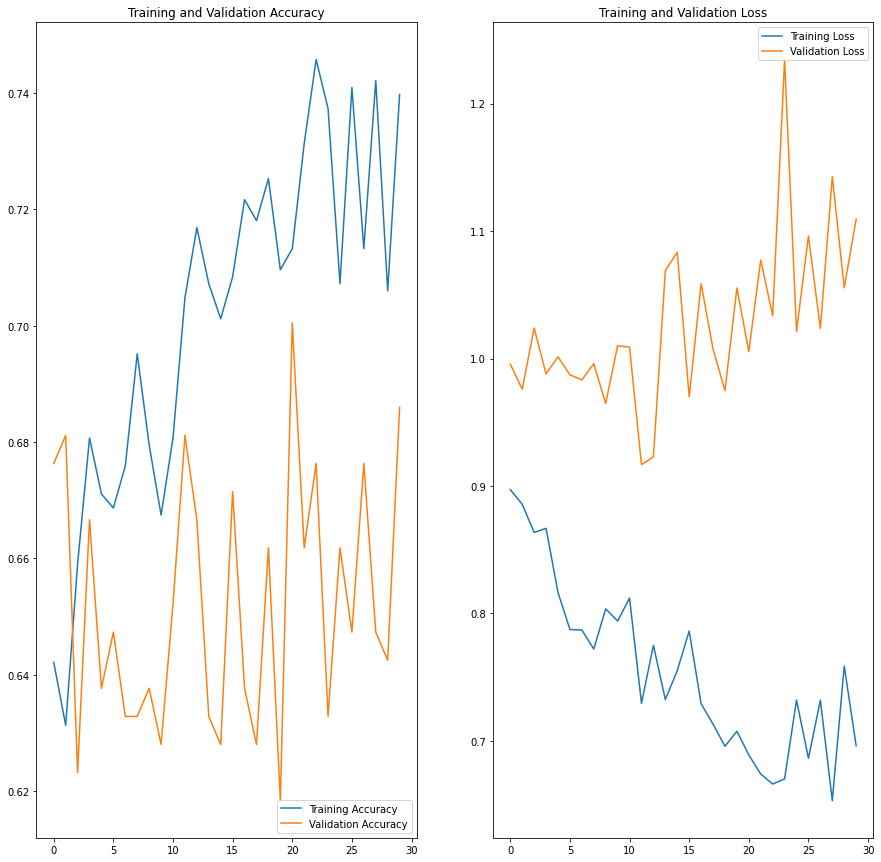

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(val_ds)

7/7 [==============================] - 1s 40ms/step - loss: 1.1094 - accuracy: 0.6860


[1.109362006187439, 0.6859903335571289]

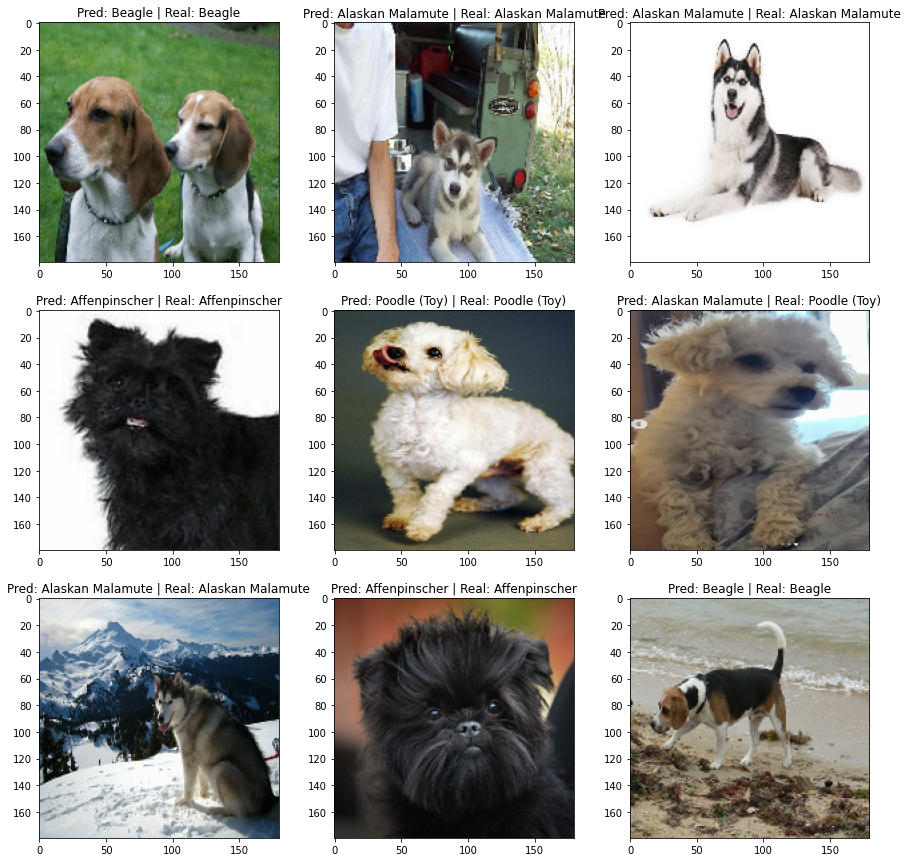

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in val_ds.take(1):
  classifications = model(images)
  # print(classifications)
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_name[index] + " | Real: " + class_name[labels[i]])

In [ ]:

dog_url = "https://www.thesprucepets.com/thmb/9UFLqcnM5C99ww1-N_c5B39u_6k=/4367x2456/smart/filters:no_upscale()/beagle-RolfKopfle-Photolibrary-Getty-135631212-56a26b1d3df78cf772756667.jpg"
dog_path = tf.keras.utils.get_file('', origin=dog_url)

img = tf.keras.utils.load_img(
    dog_path, target_size=(img_heights, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Beagle with a 34.20 percent confidence.
